# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [50]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Your code here
boston = pd.read_csv("../data/boston_data.csv")

In [35]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [36]:
len(boston)

404

In [37]:
# Z score
# threshold = 3 which is considered outlier
z = np.abs(stats.zscore(boston))
boston = boston[(z < 3).all(axis=1)]

In [38]:
# spotting outlier values 
np.where(z > 3)

(array([  9,  14,  20,  28,  29,  34,  36,  37,  38,  47,  53,  56,  57,
         62,  67,  70,  71,  71,  79,  88,  89,  91,  98, 101, 106, 111,
        111, 112, 114, 116, 136, 141, 148, 148, 150, 158, 160, 160, 161,
        165, 166, 170, 170, 177, 184, 192, 196, 198, 200, 200, 202, 205,
        212, 214, 218, 223, 226, 232, 234, 238, 241, 246, 250, 251, 251,
        252, 252, 254, 258, 258, 264, 272, 272, 272, 273, 273, 285, 285,
        297, 303, 304, 312, 314, 314, 321, 333, 337, 341, 347, 352, 355,
        369, 380, 382, 382, 400, 400, 401, 401, 401, 402], dtype=int64),
 array([ 3, 11, 11,  1,  7,  0, 13,  3, 11,  3,  1,  3,  1, 11,  3,  1,  3,
        13,  3, 13,  5, 11,  3,  1,  1,  1,  7,  1,  0,  0,  3, 11,  3,  5,
         3,  3,  1, 13,  7,  3,  3, 11, 12,  5, 11,  1, 11,  3,  5, 13,  3,
         3,  1, 11,  3, 11, 13,  1,  5,  3, 11, 11,  3,  1,  7,  1,  7,  3,
        11, 12,  3,  3,  5, 13,  0, 11,  0, 11,  3,  5, 11, 11,  1, 13,  1,
        11,  1,  3, 13, 13, 11,  3, 

In [39]:
len(boston)

321

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

In [41]:
# Dropping the columns with a lesser correlation with the pricing

boston.drop(["zn", "chas", "dis",
        "black"], axis=1, inplace=True)

In [42]:
# Defining X and y 
y = boston.medv
X = boston.drop("medv",axis = 1)

In [43]:
X.corrwith(y)

crim      -0.504009
indus     -0.565210
nox       -0.467456
rm         0.712762
age       -0.454210
rad       -0.425741
tax       -0.535400
ptratio   -0.471788
lstat     -0.754075
dtype: float64

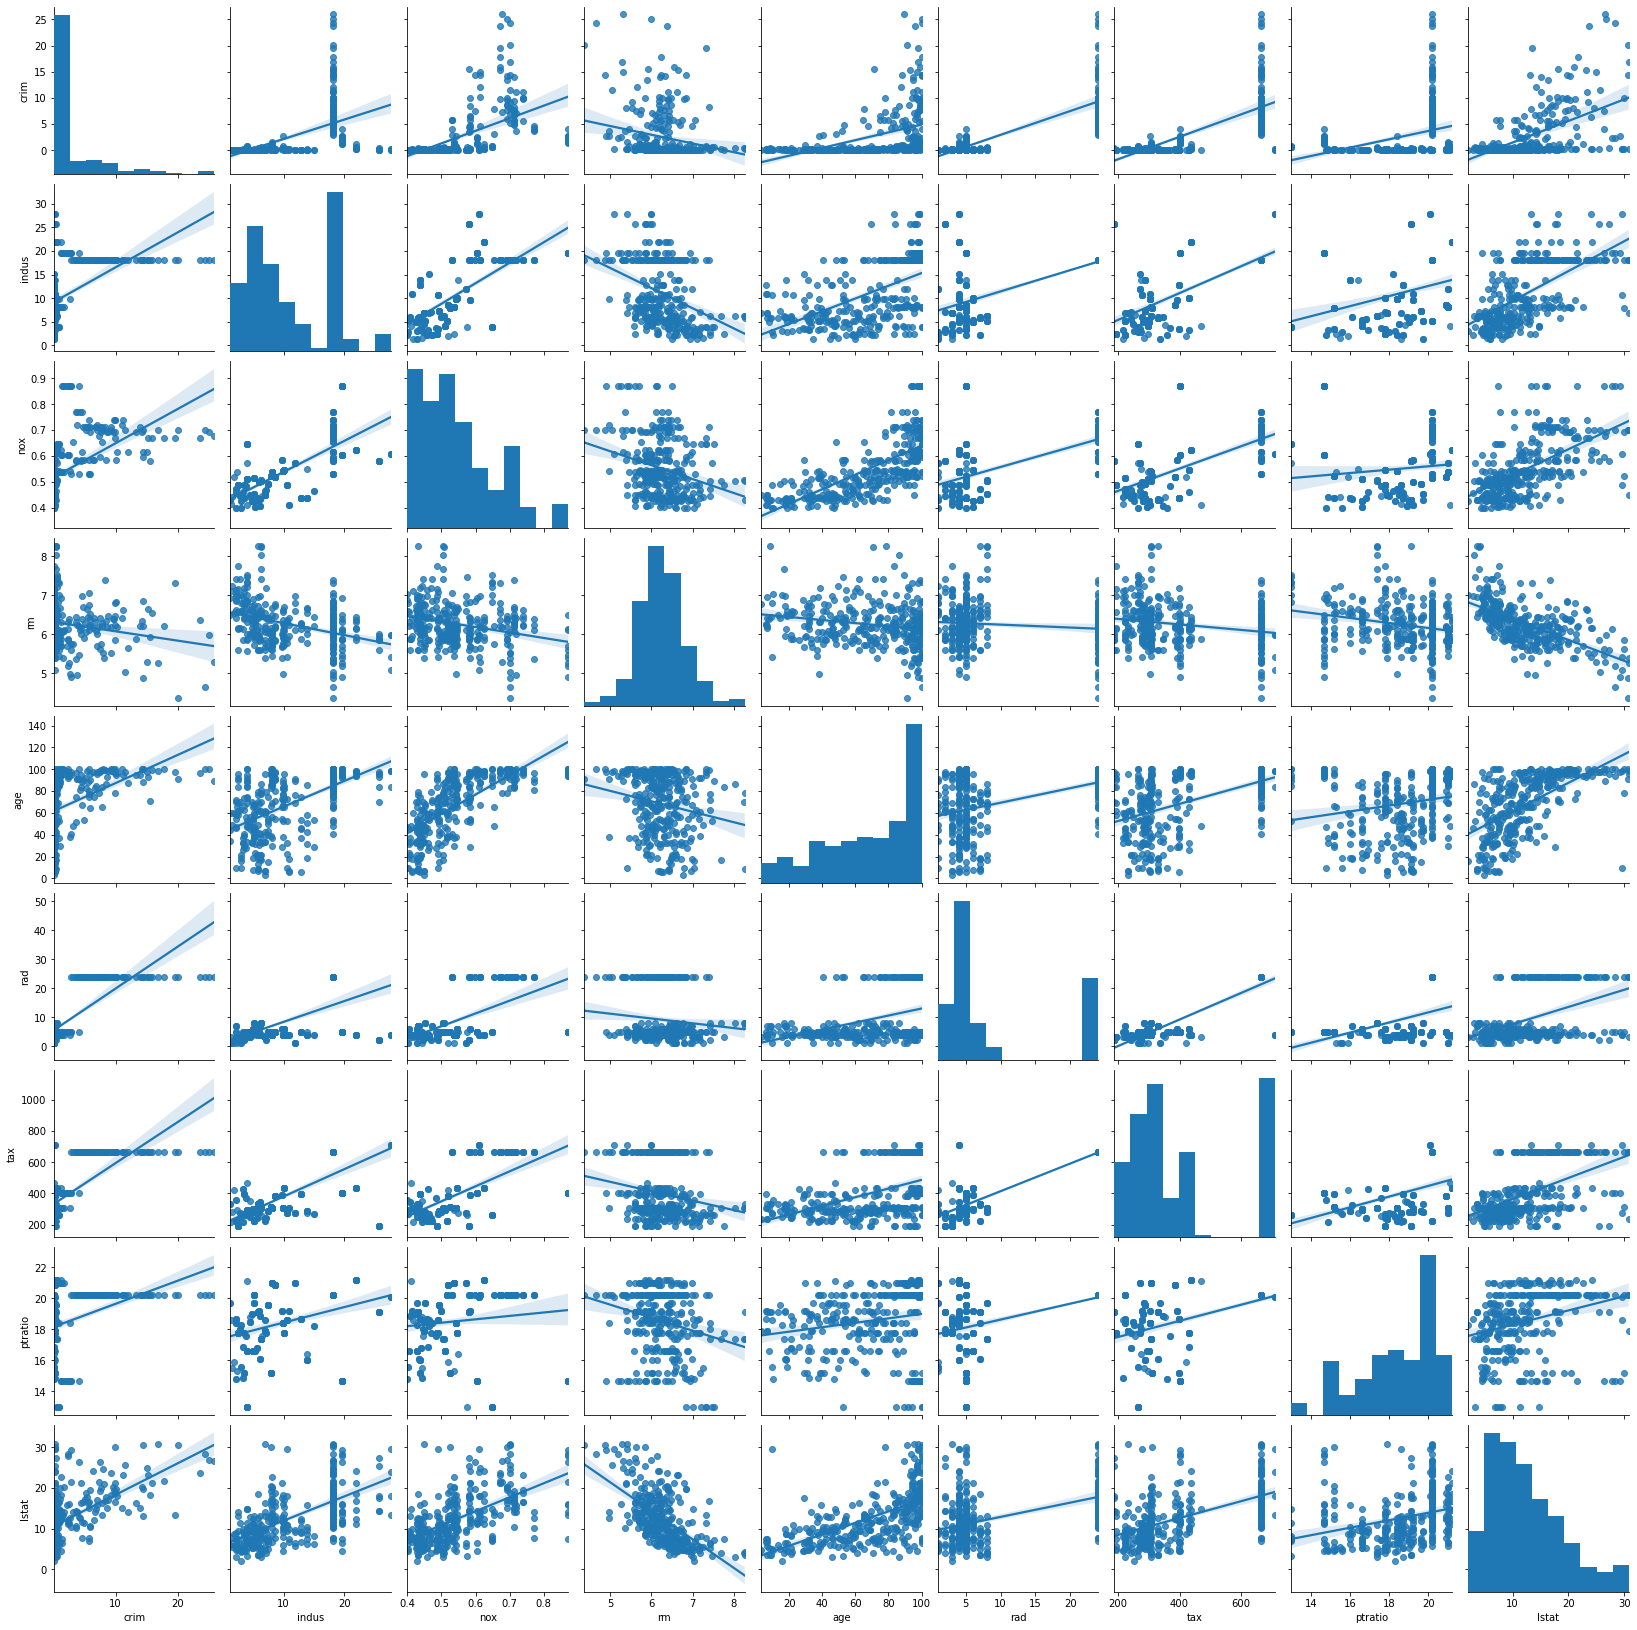

In [48]:
# Your plots here
sns.pairplot(data = X ,kind = 'reg' )

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
""" there seems to be few correlated variables"""

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

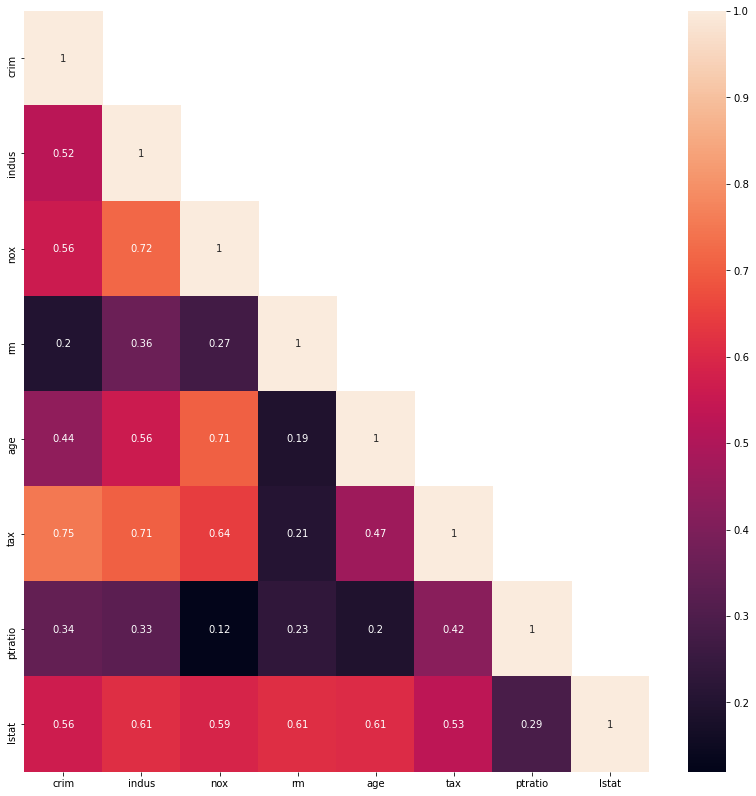

In [57]:
# Your response here
fig, ax = plt.subplots(figsize=(14,14))
corrMatrix = X.corr().abs()
lower = corrMatrix.where(~np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
sns.heatmap(lower, annot=True);

In [56]:
# Yes, rad-tax and rad - crim, so i am going to drop rad column aswell
boston = boston.drop("rad",axis = 1)
X = boston.drop("medv",axis = 1)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [60]:
# Your code here
boston.describe()

,crim,indus,nox,rm,age,tax,ptratio,lstat,medv
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,2.527761,11.034611,0.550987,6.258252,68.159813,398.532710,18.547664,12.558193,21.783489
std,4.736615,6.681523,0.110912,0.566576,27.889502,165.988346,2.041645,6.483750,7.122202
min,0.006320,1.250000,0.400000,4.368000,2.900000,188.000000,13.000000,1.980000,5.600000
25%,0.083080,5.320000,0.453000,5.891000,46.700000,281.000000,17.400000,7.510000,17.800000
50%,0.214090,8.560000,0.532000,6.223000,74.400000,311.000000,19.100000,11.320000,21.200000
75%,2.449530,18.100000,0.614000,6.556000,94.300000,469.000000,20.200000,16.350000,24.600000
max,25.940600,27.740000,0.871000,8.266000,100.000000,711.000000,21.200000,30.810000,48.300000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [64]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [65]:
# Your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [80]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

# scores
train_r2_score = []
test_r2_score = []

Now, plot the score for each tree on the training set and on the testing set.

In [81]:
#Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively
for k in range(2, 12, 2):
    regr = RandomForestRegressor(max_depth=k)
    regr.fit(X_train, y_train)
    y_predict = regr.predict(X_train)
    y_test_predict= regr.predict(X_test)
    train_r2_score.append(performance_metric(y_train, y_predict))
    print("k =", k, "\nTrain | r2 =", performance_metric(y_train, y_predict))
    test_r2_score.append(r2_score(y_test, y_test_predict))
    print("Test | r2 =", r2_score(y_test, y_test_predict))

k = 2 
Train | r2 = 0.7963912441510751
Test | r2 = 0.6037228947500922
k = 4 
Train | r2 = 0.9076308884906492
Test | r2 = 0.7047762039097063
k = 6 
Train | r2 = 0.9524159007741192
Test | r2 = 0.7249424717876554
k = 8 
Train | r2 = 0.9717454544312596
Test | r2 = 0.7663796450719177
k = 10 
Train | r2 = 0.9736281939963201
Test | r2 = 0.7611700015955106


What do these results tell you about the effect of the depth of the trees on the performance of the model?

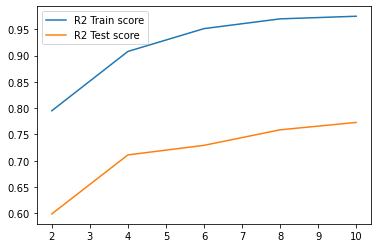

In [79]:
# Produce a plot with the score for the testing and training for the different max depths
max_depths = [2, 4, 6, 8, 10]
plt.plot(max_depths, train_r2_score, label="R2 Train score")
plt.plot(max_depths, test_r2_score, label="R2 Test score")
plt.legend()
plt.show()

In [ ]:
# Your response here
"""the more depth improves preformance until it reaches 8 max depth"""

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [82]:
for k in [1,10]:
    regr = RandomForestRegressor(max_depth=k)
    regr.fit(X_train, y_train)
    y_predict = regr.predict(X_train)
    y_test_predict= regr.predict(X_test)
    train_r2_score.append(performance_metric(y_train, y_predict))
    print("k =", k, "\nTrain | r2 =", performance_metric(y_train, y_predict))
    test_r2_score.append(r2_score(y_test, y_test_predict))
    print("Test | r2 =", r2_score(y_test, y_test_predict))


k = 1 
Train | r2 = 0.6062158895090408
Test | r2 = 0.34263421476310574
k = 10 
Train | r2 = 0.9749942923872507
Test | r2 = 0.7587305933035545


In [ ]:
# Your response here
"""With 1 max depth it's underfit, and with 10 max depth it's a bit overfit"""

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
"""for what i've seen id guess it's between 4-8 max depth, which is the less biased and overfit models"""

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here

# Training data is outdated. 
# They are, although there could be more, and more correlated with the price. 
# As for pricing in 1978 i think it would do a decent job.
# No, because we are training it with data from urban city.